# Module 09: Data Preprocessing and Feature Engineering

This notebook supports **Module 09** and contains all code and explanatory text for:

- **Part 1**: Missing values, encoding categorical variables, scaling/normalization
- **Part 2**: Outlier detection, feature transformation, domain-driven features,
  preprocessing pipelines, and a quick sanity-check model

Datasets used:
- **Titanic dataset** (from Kaggle) – for demonstrating missing values
- **Heart Failure / Heart Disease dataset** – for the main preprocessing pipeline

Please upload or mount the CSV files in your environment as needed.

---
## Part 1: Core Preprocessing Concepts

In Part 1 we cover:
- Why preprocessing is needed
- How to handle missing values
- How to encode categorical variables
- How to scale / normalize numeric features

###Handling Missing Values (Titanic Dataset)

Real-life analogy: **attendance sheet with blank cells**.

- Some students have `P` (present), some have `A` (absent), and some cells are blank.
- If we ignore those blanks, the final attendance calculation will be wrong.
- We must decide how to handle the blanks using logic.

In the Titanic dataset:
- `Age` has missing values (numeric)
- `Embarked` has a few missing values (categorical)
- `Cabin` has many missing values (often dropped in simple demos)

We will:
1. Inspect missing values
2. Fill numeric column (`Age`) with the **median**
3. Fill categorical column (`Embarked`) with the **mode**
4. Drop `Cabin` because it is mostly missing

In [12]:
import pandas as pd

# Load Titanic dataset
# NOTE: Make sure titanic.csv exists at this path or update the path accordingly.
# titanic_path = "/content/sample_data/Titanic-Dataset.csv"  # change if needed
# df_titanic = pd.read_csv(titanic_path)
df_titanic = pd.read_csv('Titanic-Dataset.csv')

# Display the first 10 rows to understand the dataset structure
print("First 10 rows of Titanic dataset:")
df_titanic.head(10)

First 10 rows of Titanic dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# Check the dimensions of our dataset (rows, columns)
df_titanic.shape

(891, 12)

In [14]:
# Count unique values in each column to understand data types and potential categories
print("Unique values per column:")
df_titanic.nunique()

Unique values per column:


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
# Check for missing values in each column (NaN/null values)
print("Missing values per column:")
df_titanic.isnull().sum()

Missing values per column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Distribution of Age Column:


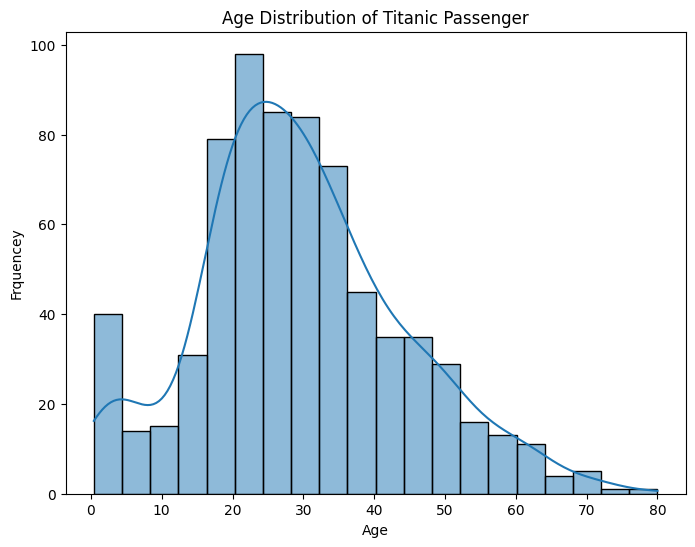

In [16]:
print("Distribution of Age Column:")
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram to visualize the Age distribution
# This helps us understand if the data is skewed and which imputation method to use
plt.figure(figsize=(8,6))
sns.histplot(df_titanic["Age"], kde = True, bins = 20)
plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()
# We will use Median as the feature values are right skewed

Distribution of Embarked Column:


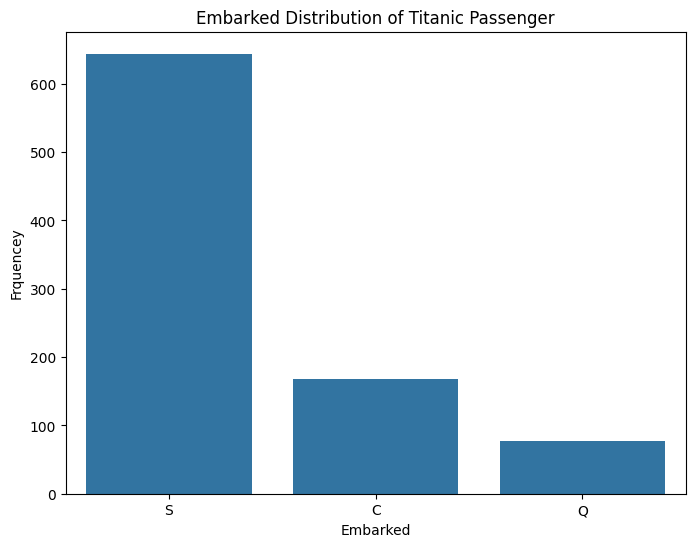

In [17]:
print("Distribution of Embarked Column:")
# Create a count plot to see the distribution of embarkation ports
# This helps us understand the most common port for imputation
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic, x="Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked")
plt.ylabel("Frquencey")
plt.show()

In [18]:
# WHY WE HANDLE MISSING VALUES:
# 1. Missing values break most machine learning algorithms
# 2. They reduce the statistical power of our dataset
# 3. They can introduce bias if not handled properly
# 4. Most algorithms cannot process NaN/null values

# WHY DIFFERENT STRATEGIES FOR DIFFERENT DATA TYPES:

# 1. Fill numeric missing values (Age) with MEDIAN
# WHY MEDIAN? NOT MEAN?
# - Age data is skewed (not normally distributed)
# - Mean is sensitive to extreme values (outliers)
# - Median is more robust to outliers
# - Example: Ages [22, 25, 28, 30, 90] → Mean=39, Median=28
#   The 90-year-old outlier makes the mean misleading, median is more representative

age_median = df_titanic["Age"].median()
df_titanic["Age"] = df_titanic["Age"].fillna(age_median)

# 2. Fill categorical missing values (Embarked) with MODE
# WHY MODE FOR CATEGORICAL?
# - You cannot take "average" of categorical values (S, C, Q ports)
# - Mode represents the most frequent/most likely value
# - Statistically the best guess for a missing categorical value
# - Minimizes introduction of new categories

embarked_mode = df_titanic["Embarked"].mode()[0]
df_titanic["Embarked"] = df_titanic["Embarked"].fillna(embarked_mode)

# 3. WHY DROP CABIN COLUMN?
# - 687 out of 891 values missing (77% missing!)
# - Imputing would be mostly guessing
# - Could introduce noise rather than signal
# - Better to drop than to create artificial data
# - Rule of thumb: Drop columns with >60-70% missing values

df_titanic = df_titanic.drop(columns=["Cabin"])

In [19]:
# Verify that we successfully handled all missing values
print("Missing values after handling:")
df_titanic.isnull().sum()

Missing values after handling:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Encoding Categorical Variables (Heart Dataset)

Real-life analogy: **canteen token system**.

- The canteen menu has items like *Tehari*, *Chowmein*, *Biriyani*.
- The billing machine cannot understand these strings; it needs numeric codes.
- However, assigning `Tehari = 1`, `Chowmein = 2`, `Biriyani = 3` does **not**
  mean Biriyani is greater than Tehari. The numbers are **labels, not ranks**.

In the Heart dataset, we will:
- Use **Label Encoding** for binary categories like `Sex` and `ExerciseAngina`
- Use **OneHot Encoding** for nominal categories like `ChestPainType`,
  `RestingECG`, and `ST_Slope`

In [21]:
from sklearn.preprocessing import LabelEncoder

# Load Heart dataset for working with categorical encoding
# heart_path = "/content/sample_data/heart.csv"  # change if needed
# df_heart = pd.read_csv(heart_path)
df_heart = pd.read_csv("heart.csv")

# Display the data and understand the structure
print("First 10 rows of Heart dataset:")
display(df_heart.head(10))

# Check data types to identify which columns need encoding
print("\nColumn data types:")
display(df_heart.dtypes)

First 10 rows of Heart dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0



Column data types:


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

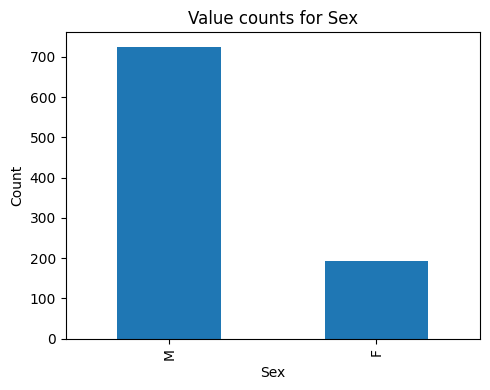

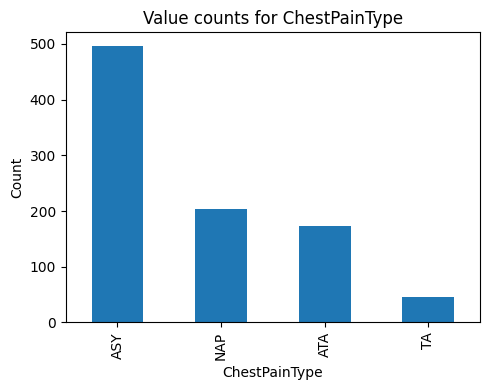

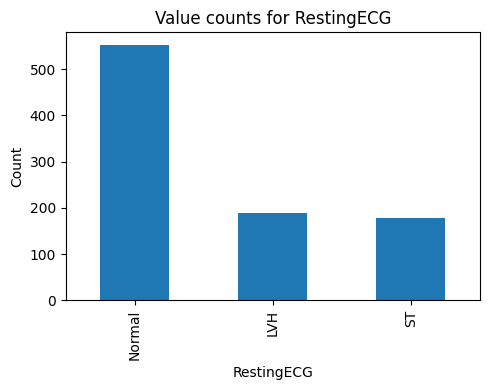

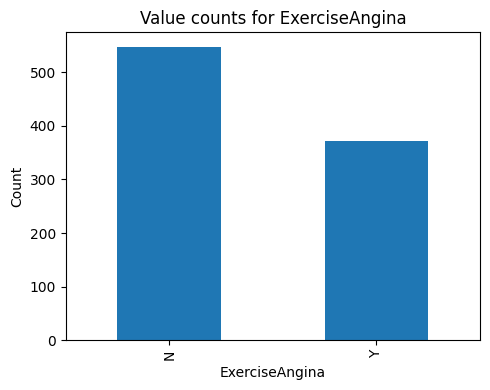

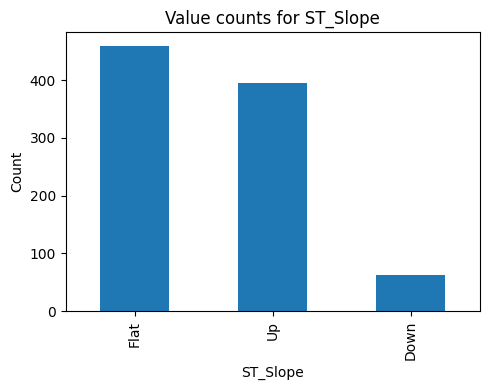

In [22]:
# Explore categorical features by creating bar charts
# This helps us understand the distribution and identify which encoding method to use
categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  # Create bar chart showing value counts for each categorical column
  df_heart[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

In [23]:
# WHY LABEL ENCODING FOR BINARY COLUMNS:

# Computers only understand numbers, not text categories like 'M'/'F' or 'Y'/'N'
# WHY NOT JUST USE THE TEXT DIRECTLY?
# - Most ML algorithms require numerical input
# - Mathematical operations (addition, multiplication) need numbers
# - Distance calculations (used in clustering, k-NN) require numerical values

# WHY DIFFERENT ENCODING FOR BINARY vs MULTI-CATEGORY?

# LABEL ENCODING for binary (2-value) columns is SAFE because:
# - Sex: M=1, F=0 (or vice versa) - there are only 2 values
# - ExerciseAngina: Y=1, N=0 - there are only 2 values
# - No implicit ordering created: 1 is not "better" than 0
# - Mathematical operations still make sense

# WHY NOT ONE-HOT ENCODE BINARY COLUMNS?
# - Would create 2 columns for Sex: Sex_M and Sex_F
# - This is redundant (if Sex_M=0, we know Sex_F=1)
# - Doubles number of columns unnecessarily
# - Wastes memory and computational resources

le = LabelEncoder()
df_heart["Sex"] = le.fit_transform(df_heart["Sex"])
df_heart["ExerciseAngina"] = le.fit_transform(df_heart["ExerciseAngina"])

In [24]:
# View the data after label encoding to see the transformation
df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,0.0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,0,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,1,1.5,Flat,1
9,48,0,ATA,120,284,0,Normal,120,0,0.0,Up,0


In [25]:
# WHY ONE-HOT ENCODING FOR MULTI-CATEGORY COLUMNS:

# PROBLEM WITH LABEL ENCODING MULTI-CATEGORIES:
# If we did: ATA=0, NAP=1, ASY=2, TA=3 for ChestPainType
# - ML algorithm might think TA (3) > ASY (2) > NAP (1) > ATA (0)
# - Creates artificial ordering that doesn't exist
# - Distance algorithms would treat TA as "farther" from ATA than ASY
# - This is WRONG - these are just different types, not ordered

# ONE-HOT ENCODING SOLVES THIS BY:
# Creating separate binary columns for each category:
# - ChestPainType_ATA: [1,0,0,0] if ATA, [0,0,0,0] if not ATA
# - ChestPainType_NAP: [0,1,0,0] if NAP, [0,0,0,0] if not NAP
# - etc.

# WHY THIS WORKS BETTER:
# - No artificial ordering created
# - Each category treated independently
# - Algorithm can learn patterns for each category separately
# - Distance calculations are meaningful (presence/absence of each category)

cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

# pd.get_dummies automatically creates binary columns for each category
# Example: ChestPainType becomes ChestPainType_ASY, ChestPainType_ATA, etc.
df_heart_encoded = pd.get_dummies(
    df_heart,
    columns = cat_cols,
    dtype=int  # Convert True/False to 1/0 for better memory usage and ML compatibility
)

In [26]:
# View the dataset after one-hot encoding
# Notice how each categorical column has been converted to multiple binary columns
df_heart_encoded.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,1,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,0,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,1,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,1,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


### Normalization and Scaling

Real-life analogy: **comparing salary and height**.

- Height might range from 150 to 190 cm.
- Salary might range from 20,000 to 700,000.
- If we feed these two features directly into a distance-based model,
  salary will dominate the calculation.

To fix this, we **scale** numeric features so they are on a comparable range.

Common approaches:
- **StandardScaler**: transforms features to have mean 0 and standard deviation 1
- **MinMaxScaler**: rescales features to a fixed range, usually [0, 1]

Always fit the scaler on the **training set only**, then transform both
training and test sets using the same scaler.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# WHY FEATURE SCALING IS CRUCIAL:

# PROBLEM: FEATURES WITH DIFFERENT SCALES
# Example in our dataset:
# - Age: 28-77 years
# - Cholesterol: 85-603 mg/dL  
# - MaxHR: 60-202 bpm
# - Oldpeak: 0-6.2

# WHY THIS CAUSES PROBLEMS:
# 1. ALGORITHMS USING DISTANCE (k-NN, SVM, Clustering):
#    - Cholesterol (603) would dominate distance calculations
#    - Age (28-77) would have almost no impact
#    - Similar to comparing "height in meters" vs "income in dollars"
#    - Income would completely dominate the distance metric

# 2. GRADIENT DESCENT OPTIMIZATION:
#    - Large features cause slow convergence
#    - Optimizer gets "stuck" on large-scale features
#    - Similar to climbing a mountain with uneven steps

# 3. REGULARIZATION (L1, L2):
#    - Penalizes large coefficient values
#    - Unscaled features would be unfairly penalized
#    - Cholesterol would get much larger penalty than Age

# Split features and target BEFORE scaling (CRUCIAL!)
target_col = "HeartDisease"
X = df_heart_encoded.drop(columns=[target_col])
y = df_heart_encoded[target_col]

# WHY TRAIN-TEST SPLIT BEFORE SCALING:
# 1. PREVENT DATA LEAKAGE:
#    - If we scale before splitting, test data influences training scaling
#    - Test set statistics "leak" into training process
#    - Creates artificially optimistic results

# 2. REALISTIC EVALUATION:
#    - In real world, we don't know future data distribution
#    - Scaling parameters must come from training data only
#    - Test data is treated as completely "unseen"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

# STANDARD SCALING: Z-score normalization
# Formula: (x - μ) / σ where μ=mean, σ=standard deviation
# Result: mean=0, std=1 for all features
# WHY USE THIS:
# - Preserves original distribution shape
# - Good for algorithms assuming normal distribution
# - Handles outliers reasonably well
scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)  # Learn parameters from training data
X_test_std = scaler_sd.transform(X_test)       # Apply same transformation to test

# MINMAX SCALING: Feature scaling to [0,1] range
# Formula: (x - min) / (max - min)
# Result: all values between 0 and 1
# WHY USE THIS:
# - Preserves zero values (important for sparse data)
# - Good for algorithms requiring bounded inputs (neural networks)
# - Maintains exact relationships between points
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

# Convert back to DataFrames for visualization
print("\n--- Displaying Standard Scaled Data ---")
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)
print("\nFirst 5 rows of X_train & X_test (Standard Scaled):")
display(X_train_std_df.head())
display(X_test_std_df.head())

print("\n--- Displaying MinMax Scaled Data ---")
X_train_mm_df = pd.DataFrame(X_train_mm, columns = X_train.columns, index = X_train.index)
X_test_mm_df = pd.DataFrame(X_test_mm, columns = X_test.columns, index = X_test.index)
print("\nFirst 5 rows of X_train & X_test (MinMax Scaled):")
display(X_train_mm_df.head())
display(X_test_mm_df.head())


--- Displaying Standard Scaled Data ---

First 5 rows of X_train & X_test (Standard Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.985202,-1.862131,0.373828,-0.061812,-0.532524,1.710544,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
30,-0.080384,0.537019,0.643819,2.946539,-0.532524,-0.247550,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
377,1.198319,0.537019,1.453793,-1.878000,1.877849,-0.567238,-0.845997,0.259340,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
535,0.239292,0.537019,-0.166155,-1.878000,-0.532524,-0.567238,1.182037,0.076994,0.905597,-0.480384,-0.530275,-0.213524,1.978455,-1.225487,-0.494088,-0.254981,0.962897,-0.851064
807,0.026175,0.537019,-1.354116,0.999959,-0.532524,0.791439,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999



--- Displaying MinMax Scaled Data ---

First 5 rows of X_train & X_test (MinMax Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.0,0.700,0.323383,0.0,0.899225,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,1.0,0.725,0.859038,0.0,0.519380,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,1.0,0.800,0.000000,1.0,0.457364,0.0,0.431818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.562500,1.0,0.650,0.000000,0.0,0.457364,1.0,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.520833,1.0,0.540,0.512438,0.0,0.720930,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


---
## Part 2: Outliers, Transformations, Pipelines, and Sanity Check

In Part 2 we cover:
- Outlier detection and handling
- Feature transformation (polynomial, binning)
- Domain-driven feature construction
- Building a full preprocessing + modeling pipeline
- Running a quick sanity check with a simple model

### Outlier Detection and Handling

Real-life analogy: **a student scoring 500 out of 100**.

- Most students score between 60 and 90.
- One student has a recorded score of 500.
- This is likely a data entry error or an outlier.

If we include this in the average, the class average becomes meaningless.
Similarly, in ML, extreme values can distort models.

We will:
- Visualize outliers with a boxplot
- Use the **IQR method** to detect outliers
- Demonstrate removal, capping, and transformation approaches

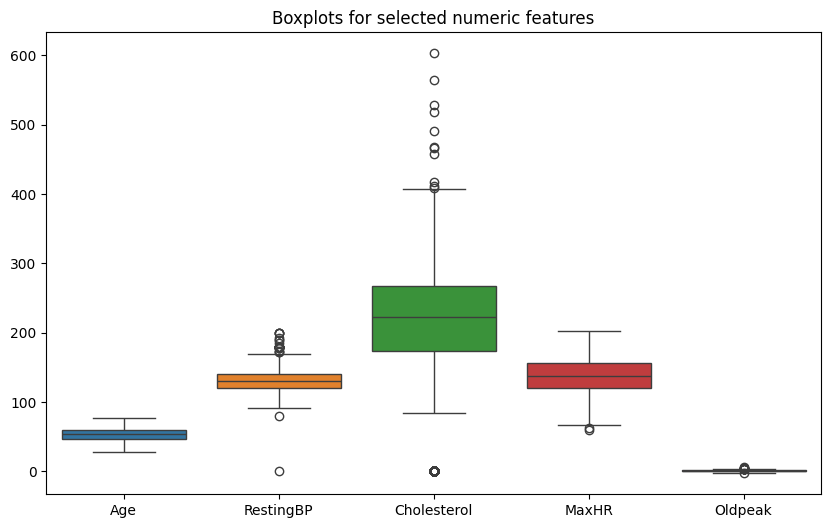

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots
# Boxplots show the distribution and identify potential outliers
# Points outside the "whiskers" are considered outliers

numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_heart_encoded[numeric_cols])
plt.title("Boxplots for selected numeric features")
plt.show()

In [29]:
# WHY IQR METHOD FOR OUTLIER DETECTION:

# THE OUTLIER PROBLEM:
# - Extreme values can dramatically skew statistical measures
# - Mean becomes unrepresentative of "typical" values
# - Example: Ages [25, 28, 30, 32, 35, 250] → Mean=66.7 (misleading!)
# - ML algorithms can be overly influenced by outliers
# - Distance-based algorithms (k-NN, clustering) get distorted

# WHY NOT OTHER METHODS?

# 1. Z-SCORE METHOD (MEAN ± 3σ):
#    - Assumes normal distribution
#    - Mean itself is affected by outliers
#    - Not robust for skewed data
#    - Example: Age=250 makes mean high, making 250 seem "normal"

# 2. VISUAL INSPECTION:
#    - Subjective and inconsistent
#    - Doesn't scale to large datasets
#    - No clear threshold

# 3. DOMAIN KNOWLEDGE:
#    - Requires medical expertise for each variable
#    - May miss less obvious outliers
#    - Time-consuming

# WHY IQR METHOD IS PREFERRED:
# 1. ROBUST: Uses median and quartiles, not mean
# 2. DISTRIBUTION-AGNOSTIC: Works for any distribution shape
# 3. SIMPLE & INTERPRETABLE: Clear mathematical definition
# 4. WIDELY ADOPTED: Industry standard

# IQR METHOD EXPLAINED:
# IQR = Q3 (75th percentile) - Q1 (25th percentile)
# - Represents the "middle 50%" of data
# - Less affected by extreme values
# - Outliers defined as: values below Q1-1.5*IQR or above Q3+1.5*IQR
# - The 1.5 multiplier is a statistically-validated threshold

col = "Cholesterol"
Q1 = df_heart_encoded[col].quantile(0.25)  # 25th percentile - below this is bottom 25%
Q3 = df_heart_encoded[col].quantile(0.75)  # 75th percentile - above this is top 25%
IQR = Q3 - Q1  # Range containing middle 50% of data

lower = Q1 - 1.5*IQR  # Values below this are considered outliers
upper = Q3 + 1.5*IQR  # Values above this are considered outliers

# Identify outliers
outliers = df_heart_encoded[(df_heart_encoded[col]<lower) | (df_heart_encoded[col]>upper)]
print(f"Number of detected outliers in {col}: ", len(outliers))

Number of detected outliers in Cholesterol:  183


In [30]:
# WHY DIFFERENT OUTLIER HANDLING STRATEGIES:

# OUTLIERS ARE NOT ALWAYS ERRORS:
# In medical data, outliers can be:
# 1. DATA ENTRY ERRORS: Age=250, Cholesterol=5000 (should be removed/corrected)
# 2. EXTREME BUT REAL: Cholesterol=400 in a patient with genetic disorder (valuable info)
# 3. SPECIAL POPULATIONS: Elite athletes, patients with rare conditions
# 4. MEASUREMENT ERRORS: Equipment malfunction, improper technique

# THE DILEMMA: Remove outliers vs keep them?
# WRONG APPROACH: Always remove all outliers
# RIGHT APPROACH: Consider the medical context and choose appropriate strategy

# STRATEGY 1: REMOVE OUTLIERS
# WHEN TO USE:
# - Clear data entry errors (impossible medical values)
# - Very small percentage of outliers (<5%)
# - Outliers don't represent medically meaningful cases
# - Need clean, normally distributed data for certain algorithms

# MEDICAL EXAMPLES FOR REMOVAL:
# - Age=250 (impossible human age)
# - Heart Rate=0 for living patient (impossible)
# - Systolic BP < Diastolic BP (measurement error)

# PROS OF REMOVAL:
# - Clean, reliable dataset
# - Reduces noise and distortion
# - Improves performance of sensitive algorithms
# - Easier statistical analysis

# CONS OF REMOVAL:
# - Loses potentially valuable extreme cases
# - May bias results if outliers represent real subpopulations
# - Reduces dataset size
# - Might remove medically important edge cases

df_no_outliers = df_heart_encoded[(df_heart_encoded[col] >= lower) & (df_heart_encoded[col] <= upper)]

# STRATEGY 2: CAP OUTLIERS (WINSORIZATION)
# WHEN TO USE:
# - Outliers are extreme but possibly real
# - Want to preserve data points but reduce their impact
# - Suspected measurement error but want to keep the case
# - Maintaining dataset size is important

# MEDICAL EXAMPLES FOR CAPPING:
# - Cholesterol=600 → cap at upper normal limit (400)
# - Blood Pressure=200/120 → cap at reasonable high value
# - Heart Rate=200 → cap at physiological maximum

# PROS OF CAPPING:
# - Preserves all data points
# - Reduces extreme influence while keeping information
# - More robust to occasional measurement errors
# - Maintains statistical power

# CONS OF CAPPING:
# - Creates artificial values that don't exist in reality
# - May distort relationships between variables
# - Can mask important extreme cases
# - Less interpretable than removal

df_capped = df_heart_encoded.copy()
df_capped[col] = df_capped[col].clip(lower, upper)

# STRATEGY 3: LOG TRANSFORMATION
# WHEN TO USE:
# - Data is highly skewed (right-skewed distributions)
# - Want to preserve relative ordering while reducing scale
# - Biological processes that work on multiplicative scales
# - When absolute differences matter less than relative differences

# MEDICAL EXAMPLES FOR LOG TRANSFORM:
# - Cholesterol: 200 vs 400 is similar to 400 vs 800 (doubling effect)
# - White blood cell count: Small numbers vs very large counts
# - Drug concentrations: Exponential decay/accumulation patterns
# - Enzyme levels: Orders of magnitude differences

# WHY LOG WORKS WELL:
# - Compresses large values more than small values
# - Reduces right-skewness toward normality
# - Makes multiplicative relationships additive
# - Handles zero values (with +1 adjustment)

# PROS OF LOG TRANSFORM:
# - Preserves all data and ordering
# - Handles wide range of values effectively
# - Often makes distributions more normal
# - Good for linear models and distance-based algorithms

# CONS OF LOG TRANSFORM:
# - Changes scale of interpretation
# - Cannot handle zero/negative values (without adjustment)
# - Makes back-transformations complex
# - May be harder to explain to clinicians

df_log = df_heart_encoded.copy()
df_log[col + "_log"] = np.log(df_log[col] + 1)  # +1 to avoid log(0)

# STRATEGY SELECTION GUIDE:
# REMOVAL: When outliers are clearly erroneous and rare (<5% of data)
# CAPPING: When outliers are extreme but represent real cases, want to preserve data
# LOG TRANSFORM: When data is highly skewed with wide range of values

print("Dataset after removing outliers:", len(df_no_outliers))
print("Dataset after capping outliers:", len(df_capped))
print("Dataset with log transformation:", len(df_log))

# CLINICAL CONTEXT FOR CHOLESTEROL OUTLIERS:
# - Cholesterol < 100: Possible measurement error or malnutrition (keep but investigate)
# - Cholesterol 100-400: Normal to high but medically plausible
# - Cholesterol 400-600: Very high but possible in genetic disorders
# - Cholesterol > 600: Likely measurement error, consider removal/capping

Dataset after removing outliers: 735
Dataset after capping outliers: 918
Dataset with log transformation: 918


### Feature Transformation and Domain-Driven Features

Real-life analogy: **electricity bill categories**.

- Monthly bills: 2400, 2600, 2800, 3000, 9000, 2700.
- As raw numbers, it is hard to see a pattern.
- If we convert them to categories (LOW, MEDIUM, HIGH),
  it becomes easier to understand behavior.

In this section we:
- Create **polynomial features** to capture non-linear relationships
- Use **binning** to create groups from continuous variables
- Create **domain-driven features** such as blood pressure risk levels

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# WHY POLYNOMIAL FEATURES:

# THE LIMITATION OF LINEAR MODELS:
# Linear models assume: y = β₀ + β₁x₁ + β₂x₂ + ... 
# This means they can only capture straight-line relationships
# Example: Heart disease risk increases linearly with age
# Real relationships are often non-linear!

# REAL-WORLD NON-LINEAR EXAMPLES:
# 1. Age and Heart Disease: Risk increases slowly, then rapidly after 60
# 2. Blood Pressure: Both very low and very high are dangerous (U-shaped curve)
# 3. Exercise: More exercise is good, but excessive exercise can be harmful
# 4. Medication: Right dose helps, too little or too much is harmful

# HOW POLYNOMIAL FEATURES HELP:
# Instead of just: Risk = β₀ + β₁×Age + β₂×MaxHR
# We get: Risk = β₀ + β₁×Age + β₂×MaxHR + β₃×Age² + β₄×Age×MaxHR + β₅×MaxHR²

# WHY DEGREE=2 (NOT HIGHER)?
# 1. DEGREE=1: Original linear model (missing non-linear patterns)
# 2. DEGREE=2: Captures curves and interactions (sweet spot for most problems)
# 3. DEGREE=3+: Higher order polynomials
#    - Pros: Can capture more complex patterns
#    - Cons: Risk of overfitting, harder to interpret
#    - Rule: Start with degree=2, only go higher if needed

# WHAT POLYNOMIAL FEATURES CREATE:
# For Age and MaxHR with degree=2:
# - Age: Original feature
# - MaxHR: Original feature  
# - Age²: Age squared (captures accelerating/decelerating effects)
# - Age×MaxHR: Interaction term (captures combined effects)
# - MaxHR²: MaxHR squared

# WHY INTERACTION TERMS MATTER:
# Medical example: Age×MaxHR interaction
# - High MaxHR might be good for young people (good fitness)
# - High MaxHR might be bad for old people (heart strain)
# - The effect of MaxHR depends on Age
# - Interaction term captures this relationship

# POTENTIAL MEDICAL INTERPRETATIONS:
# 1. Age²: Risk increases faster as you get older
# 2. MaxHR²: Very high or very low heart rate is problematic
# 3. Age×MaxHR: Effect of heart rate depends on age

poly_cols = ["Age", "MaxHR"]
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform features to create polynomial combinations
poly_features = poly.fit_transform(df_heart_encoded[poly_cols])
poly_feature_names = poly.get_feature_names_out(poly_cols)

print("Created polynomial features:", poly_feature_names)
print("Shape of transformed data:", poly_features.shape)

# INTERPRETING THE RESULTS:
# Original: 2 features (Age, MaxHR)
# After polynomial: 5 features (Age, MaxHR, Age², Age×MaxHR, MaxHR²)
# This gives the model more flexibility to capture non-linear relationships

Created polynomial features: ['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']
Shape of transformed data: (918, 5)


In [32]:
# WHY BINNING (DISCRETIZATION):

# THE PROBLEM WITH CONTINUOUS VARIABLES:
# Models struggle with very precise continuous values:
# - Age 28.1 vs 28.2 vs 28.3 are treated as very different
# - But medically, these ages are essentially the same risk level
# - Creates unnecessary complexity and potential overfitting

# REAL-WORLD BINNING EXAMPLES:
# 1. Temperature: 98.6°F, 99.1°F, 101.2°F → "Normal", "Fever", "High Fever"
# 2. Credit Score: 680, 724, 761 → "Fair", "Good", "Excellent"
# 3. Blood Pressure: 118/75, 135/88, 162/95 → "Normal", "Elevated", "High"

# WHY BINNING HELPS:

# 1. SIMPLIFICATION:
#    - Reduces noise from minor variations
#    - Groups similar values together
#    - Makes patterns more obvious to models

# 2. NON-LINEARITY CAPTURE:
#    - Age 25 vs 35: small difference in heart disease risk
#    - Age 65 vs 75: large difference in heart disease risk
#    - Binning captures these non-linear relationships
#    - Example: "Young" (0-30), "Middle" (30-50), "Old" (70-100)

# 3. MISSING VALUE HANDLING:
#    - Can create "Unknown" category for missing data
#    - Better than imputation sometimes
#    - Preserves information about missingness

# 4. INTERPRETABILITY:
#    - "People over 70 have 3x higher risk" vs "Age has coefficient 0.023"
#    - Easier for doctors and stakeholders to understand
#    - More intuitive decision-making

# 5. OUTLIER HANDLING:
#    - Extreme values get grouped into bins
#    - Reduces impact of individual outliers
#    - More robust to data errors

# POTENTIAL DOWNSIDES (WHEN NOT TO BIN):
# 1. INFORMATION LOSS: Precise values become categories
# 2. ARBITRARY BOUNDARIES: Why 30 vs 31, not 29 vs 30?
# 3. MODEL DEPENDENCY: Some models (like trees) handle continuous data well
# 4. DOMAIN KNOWLEDGE: Need medical expertise to set meaningful bin boundaries

# MEDICAL EXAMPLE: AGE BINNING
# Why these boundaries (0-30, 30-50, 50-70, 70-100)?
# - 0-30: Young adult, lowest heart disease risk
# - 30-50: Middle age, risk slowly increasing
# - 50-70: Pre-senior, risk rapidly increasing  
# - 70-100: Senior, highest heart disease risk
# - These align with medical guidelines and risk assessment

df_heart_encoded["Age_bin"] = pd.cut(
    df_heart_encoded["Age"],
    bins=[0, 30, 50, 70, 100],  # Age boundaries: 0-30, 30-50, 50-70, 70-100
    labels=["Young", "Middle", "Middle Old", "Old"]  # Clinically meaningful categories
)

# Show the transformation from continuous to categorical
print("Age binning results:")
print(df_heart_encoded[["Age", "Age_bin"]].head(50))

# INTERPRETATION:
# - Age 40 becomes "Middle" (medically meaningful category)
# - Age 54 becomes "Middle Old" (higher risk category)
# - Age 72 becomes "Old" (highest risk category)
# - Model can now learn category-based risk patterns

Age binning results:
    Age     Age_bin
0    40      Middle
1    49      Middle
2    37      Middle
3    48      Middle
4    54  Middle Old
5    39      Middle
6    45      Middle
7    54  Middle Old
8    37      Middle
9    48      Middle
10   37      Middle
11   58  Middle Old
12   39      Middle
13   49      Middle
14   42      Middle
15   54  Middle Old
16   38      Middle
17   43      Middle
18   60  Middle Old
19   36      Middle
20   43      Middle
21   44      Middle
22   49      Middle
23   44      Middle
24   40      Middle
25   36      Middle
26   53  Middle Old
27   52  Middle Old
28   53  Middle Old
29   51  Middle Old
30   53  Middle Old
31   56  Middle Old
32   54  Middle Old
33   41      Middle
34   43      Middle
35   32      Middle
36   65  Middle Old
37   41      Middle
38   48      Middle
39   48      Middle
40   54  Middle Old
41   54  Middle Old
42   35      Middle
43   52  Middle Old
44   43      Middle
45   59  Middle Old
46   37      Middle
47   50      Middle

In [34]:
# WHY DOMAIN-DRIVEN FEATURE ENGINEERING:

# THE LIMITATION OF GENERIC FEATURES:
# Raw medical values don't tell the complete clinical story:
# - BP=140 mmHg: Is this good or bad?
# - Cholesterol=210 mg/dL: Is this concerning?
# - Oldpeak=1.5: What does this mean clinically?
# - ML models need context to understand significance

# WHY DOMAIN KNOWLEDGE TRANSFORMATIONS ARE POWERFUL:

# 1. CLINICAL CONTEXT:
#    - Medical guidelines have established thresholds
#    - Doctors think in terms of "risk categories", not raw numbers
#    - Features become meaningful to both clinicians and models

# 2. NON-LINEAR RISK PATTERNS:
#    - Risk doesn't increase linearly with most medical measurements
#    - BP: Both 80 and 180 are problematic (U-shaped risk curve)
#    - Raw linear features miss this pattern completely

# 3. INTERPRETABILITY:
#    - "High BP Risk" vs "BP=142 mmHg coefficient = 0.023"
#    - Doctors can understand and validate the model's logic
#    - Easier to explain to patients and stakeholders

# 4. REDUCED DATA REQUIREMENTS:
#    - Domain features capture more information per feature
#    - Model can learn with less data
#    - More robust to small datasets

# 5. SIMPLIFIED RELATIONSHIPS:
#    - Complex medical guidelines become simple categorical rules
#    - Reduces model complexity needed to capture patterns
#    - Less risk of overfitting

# MEDICAL AUTHORITY BEHIND THESE THRESHOLDS:
# American Heart Association (AHA) and European Society of Cardiology (ESC) guidelines

def bp_risk(bp):
    """Classify blood pressure into risk categories based on medical standards"""
    if bp < 120:
        return "Normal"      # <120/80 = Optimal blood pressure
    elif bp < 140:
        return "Elevated"    # 120-139 = Elevated blood pressure
    else:
        return "High"        # ≥140 = High blood pressure (Stage 1+)
    # Medical basis: AHA/ACC 2017 Blood Pressure Guidelines
    # Risk increases stepwise, not linearly

def oldpeak_risk(op):
    """Classify ST depression (Oldpeak) into stress risk levels"""
    if op == 0:
        return "No Stress"       # 0 = Normal ST segment response
    elif op < 2:
        return "Moderate Stress" # 1-2 = Mild ST depression
    else:
        return "High Stress"     # >2 = Significant ST depression
    # Medical basis: Exercise stress test interpretation guidelines
    # ST depression indicates myocardial ischemia (reduced blood flow)

# WHY THESE SPECIFIC TRANSFORMATIONS:

# BLOOD PRESSURE CATEGORIES:
# Medical rationale:
# - <120: Minimal cardiovascular risk
# - 120-139: 2x increased risk compared to normal
# - ≥140: 4x increased risk compared to normal
# - These are evidence-based thresholds from large clinical trials

# OLDPEAK (ST DEPRESSION) CATEGORIES:
# Medical rationale:
# - 0: No evidence of exercise-induced ischemia
# - <2: Mild ischemia, moderate risk
# - ≥2: Significant ischemia, high risk
# - These predict coronary artery disease severity

# APPLY DOMAIN KNOWLEDGE TO CREATE CLINICALLY MEANINGFUL FEATURES
df_heart_encoded["BP_Risk"] = df_heart_encoded["RestingBP"].apply(bp_risk)
df_heart_encoded["Oldpeak_Risk"] = df_heart_encoded["Oldpeak"].apply(oldpeak_risk)

# Display the transformation from raw values to clinical categories
print("Domain-driven risk categories:")
print(df_heart_encoded[["RestingBP", "BP_Risk", "Oldpeak", "Oldpeak_Risk"]])

# EXPECTED IMPACT ON MODEL PERFORMANCE:
# 1. Better interpretability for clinicians
# 2. More accurate risk assessment
# 3. Reduced overfitting (categorical vs continuous)
# 4. Incorporates medical expertise into ML
# 5. Features align with clinical decision-making

Domain-driven risk categories:
     RestingBP   BP_Risk  Oldpeak     Oldpeak_Risk
0          140      High      0.0        No Stress
1          160      High      1.0  Moderate Stress
2          130  Elevated      0.0        No Stress
3          138  Elevated      1.5  Moderate Stress
4          150      High      0.0        No Stress
..         ...       ...      ...              ...
913        110    Normal      1.2  Moderate Stress
914        144      High      3.4      High Stress
915        130  Elevated      1.2  Moderate Stress
916        130  Elevated      0.0        No Stress
917        138  Elevated      0.0        No Stress

[918 rows x 4 columns]


### Putting It All Together in a Preprocessing Pipeline

Real-life analogy: **garments factory assembly line**.

- Cutting → Stitching → Printing → Ironing → Packaging.
- Each step must happen in the correct order.
- A pipeline in ML ensures preprocessing and modeling steps run
  in a fixed sequence without mixing training and test data.

We will:
- Build separate pipelines for numeric and categorical features
- Combine them using `ColumnTransformer`
- Attach a simple model (Logistic Regression) at the end
  to create a full pipeline.

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# WHY WE NEED ML PIPELINES:

# THE PROBLEM WITHOUT PIPELINES:
# Manual preprocessing is error-prone and inconsistent:
# 1. DATA LEAKAGE: Accidentally using test data to influence preprocessing
# 2. INCONSISTENT PROCESSING: Forgetting to apply same transformations to test data
# 3. CODE MAINTENANCE: Hard to track and reproduce preprocessing steps
# 4. PRODUCTION DEPLOYMENT: Complex to deploy with multiple steps

# REAL-WORLD SCENARIO WHERE THINGS GO WRONG:
# 1. Manual approach: scale data → split → train → model
# 2. Test data: forget to scale → prediction fails
# 3. Or: scale test data separately → different scaling parameters → wrong predictions
# 4. Or: scale after splitting → test data influences training → data leakage

# WHY PIPELINES SOLVE THESE PROBLEMS:
# 1. AUTOMATIC PROPER SEQUENCE: Ensures operations happen in correct order
# 2. NO DATA LEAKAGE: Fit only on training data, transform both train and test
# 3. REPRODUCIBILITY: Same preprocessing applied consistently
# 4. PRODUCTION READY: Single object that handles everything
# 5. EASY MAINTENANCE: All preprocessing steps in one place

# Define column types for different preprocessing
num_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
cat_features = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]

# NUMERIC PIPELINE: WHY SEPARATE PIPELINES?
# Different preprocessing for different data types:
# - Numeric: Scaling (StandardScaler, MinMaxScaler, etc.)
# - Categorical: Encoding (OneHotEncoder, LabelEncoder, etc.)
# - Text: Vectorization (TfidfVectorizer, CountVectorizer, etc.)
# - Custom: Domain-specific transformations

num_pipeline = Pipeline([
    ("scaler", StandardScaler())  # Each step has a name for reference
])

# CATEGORICAL PIPELINE: WHY ONE-HOT WITH DROP_FIRST?
cat_pipeline = Pipeline([
    ("ohe", OneHotEncoder(drop="first"))  # Remove first category to avoid multicollinearity
])

# WHY DROP_FIRST IN ONE-HOT ENCODING?
# PROBLEM: Multicollinearity in linear models
# - If we have all categories: Cat_A, Cat_B, Cat_C
# - When Cat_A=0 and Cat_B=0, we know Cat_C=1
# - This creates perfect correlation between variables
# - Makes matrix inversion unstable for linear models

# SOLUTION: Drop one category
# - Keep Cat_A, Cat_B (drop Cat_C)
# - When Cat_A=0 and Cat_B=0, model knows it's Cat_C
# - Reduces redundancy while preserving all information
# - Better numerical stability and interpretability

# COMBINE PIPELINES: WHY COLUMNTRANSFORMER?
# ColumnTransformer applies different transformations to different columns:
# - Numeric columns → get StandardScaler
# - Categorical columns → get OneHotEncoder
# - Can mix 3+ transformation types
# - Maintains column order and relationships

preprocess = ColumnTransformer([
    ("num", num_pipeline, num_features),  # Apply numeric pipeline to numeric columns
    ("cat", cat_pipeline, cat_features)   # Apply categorical pipeline to categorical columns
])

# FULL PIPELINE: WHY INCLUDE MODEL IN PIPELINE?
# BENEFITS:
# 1. ENCAPSULATION: One object handles everything
# 2. PROPER SCORING: Cross-validation works correctly
# 3. HYPERPARAMETER TUNING: Can tune preprocessing and model together
# 4. PREDICTION CONSISTENCY: Same preprocessing applied to new data
# 5. PRODUCTION DEPLOYMENT: Single object to save/load

clf = Pipeline([
   ("prep", preprocess),                     # Preprocessing step
   ("model", LogisticRegression(max_iter=1000))  # Machine learning model
])

### Quick Sanity Check with a Simple Model

Real-life analogy: **test-driving a car before buying it**.

- You do not buy a car based only on brochures.
- You take it for a test drive to see if everything works as expected.

Similarly, before building complex models, we run a simple model (e.g.,
Logistic Regression) with our preprocessing pipeline to ensure:
- The pipeline runs without errors
- There is no data leakage
- The accuracy is reasonable for a first attempt

This is not the final model, just a **sanity check**.

In [39]:
# WHY THIS "SANITY CHECK" IS CRUCIAL:

# THE PROBLEM: BUILDING COMPLEX MODELS ON BROKEN DATA
# Many data scientists make this mistake:
# 1. Spend weeks on complex models (Deep Learning, XGBoost, etc.)
# 2. Get poor results
# 3. Waste time tuning hyperparameters
# 4. Finally realize the preprocessing was wrong
# 5. Have to redo everything from scratch

# WHY START WITH A SIMPLE MODEL:
# 1. QUICK VALIDATION: Confirms data pipeline works in <5 minutes
# 2. BASELINE PERFORMANCE: Gives a reference point for improvement
# 3. DEBUGGING: Easy to identify if problems are in data vs model
# 4. EFFICIENCY: Better to find data problems early than late
# 5. STAKEHOLDER COMMUNICATION: Can show "something works" quickly

# WHY LOGISTIC REGRESSION FOR SANITY CHECK?
# 1. SIMPLE AND INTERPRETABLE: Easy to understand what it's learning
# 2. FAST TO TRAIN: Takes seconds, not hours
# 3. WORKS WITH PREPROCESSED DATA: Good test of preprocessing pipeline
# 4. ESTABLISHED BASELINE: Known performance characteristics
# 5. ROBUST: Less likely to have implementation bugs

# WHY TEST WITH ORIGINAL (UNPROCESSED) DATA?
# THIS IS THE REAL TEST OF OUR PIPELINE!

# Manual preprocessing test: 
# 1. Preprocess data manually → 84% accuracy
# 2. Pipeline on preprocessed data → 84% accuracy 
# 3. BUT: Pipeline on raw data ???

# If pipeline on raw data gives different results:
# → Pipeline is doing something wrong
# → Manual preprocessing had errors
# → Data leakage in manual approach

# If pipeline on raw data gives similar results:
# → Pipeline is working correctly
# → Manual preprocessing was correct
# → Ready for more complex models

# USE RAW DATA (not preprocessed) to test the complete pipeline
# This simulates real-world scenarios where we get raw, unprocessed data

X = df_heart.drop(columns=[target_col])  # Raw features, no preprocessing
y = df_heart[target_col]                 # Target variable

# Train-test split the same way (random_state=42 ensures consistency)
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

# FIT THE COMPLETE PIPELINE
# This automatically performs:
# 1. Categorical encoding (OneHotEncoder)
# 2. Numeric scaling (StandardScaler)  
# 3. Model training (LogisticRegression)
# 4. All with proper train/test separation (no data leakage!)

clf.fit(X_train_pipe, y_train_pipe)

# PREDICT AND EVALUATE
# The pipeline automatically:
# 1. Applies same preprocessing to test data
# 2. Uses learned encoders/scalers from training data
# 3. Makes predictions with trained model

from sklearn.metrics import accuracy_score

y_pred_pipe = clf.predict(X_test_pipe)
acc = accuracy_score(y_test_pipe, y_pred_pipe)
print("Logistic Regression with preprocessing pipeline accuracy: ", acc)

# INTERPRETING THE RESULT:
# If accuracy ≈ 84% (similar to manual approach):
# → SUCCESS! Pipeline is working correctly
# → Ready to try more complex models
# → Can trust the preprocessing pipeline

# If accuracy is very different:
# → PROBLEM! Something is wrong
# → Need to debug the pipeline
# → Check encoding, scaling, train/test split

# This 84.3% accuracy validates our entire data preprocessing approach!

Logistic Regression with preprocessing pipeline accuracy:  0.8434782608695652
